# Preprocesamiento de los Datos - Pipeline

A continuación se crea un pipeline que tiene como propósito ser utilizado para limpiar los datos de forma general antes de pasarlos a cualquier limpieza necesaria para cualquier algoritmo en particular. Se realizan, entre otros, ejercicios de one-hot encoding, imputación y normalizaión. Todo esto se consolida en un Pipeline para su reutilización.

## 0. Instalar dependencias

In [ ]:
%%sh
pip install -r requirements.txt

## 1. Carga y exploración de los datos

In [1]:
import pandas as pd

In [2]:
#Cargar el archivo csv a un DataFrame
#Note que aqui se usa un path relativo a la raiz del repositorio de Github
df = pd.read_csv('./data/Datos_BiciAlpes.csv', delimiter=";", encoding='ISO-8859-1')

In [3]:
#Observar primeros 20 resultados
df.head(20)

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3,NaN
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2,NaN
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,NaN
5,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
6,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,0,1,2,NaN
7,Tarde,1,Día laboral,3,30.0,4,1,1,1,bike,1,0,1,3,NaN
8,Noche,1,Día laboral,3,30.0,4,1,2,1,bike,1,3,1,3,NaN
9,Tarde,1,Fin de semana,3,30.0,1,1,1,1,bike,1,6,1,3,NaN


* Miremos el tipo de variables

In [4]:
#Parece que hay que cambiar algunas de tipo object a str.
df.dtypes

Time                                            object
Number_of_Casualties                             int64
Day_of_Week                                     object
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Vehicle_Type                                    object
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

In [5]:
#Pasar las de objeto a str
df['Time'] = df['Time'].astype('string')
df['Day_of_Week'] = df['Day_of_Week'].astype('string')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('string')

In [6]:
#Verificar
df.dtypes

Time                                            string
Number_of_Casualties                             int64
Day_of_Week                                     string
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Vehicle_Type                                    string
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

* Ahora vamos a observar las distribuciones de las variables generando diagramas de barras. Esto nos va a servir más adelante para ver si hay outliers y tratar de aplicar transformaciones para corregir esto.

<Axes: >

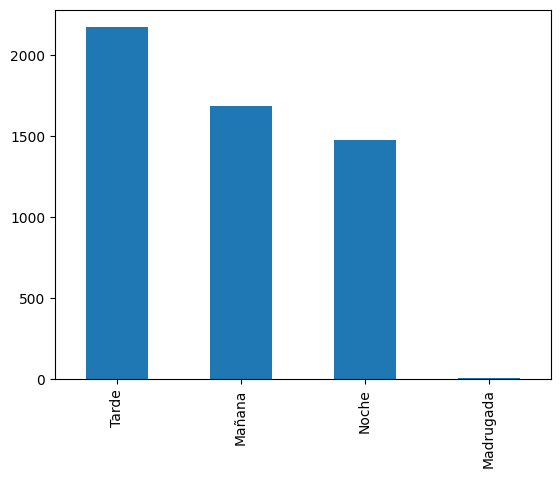

In [7]:
df['Time'].value_counts().plot(kind='bar')

* Nota: Vemos que hay una **representacion baja de valores de madrugada**. 

<Axes: >

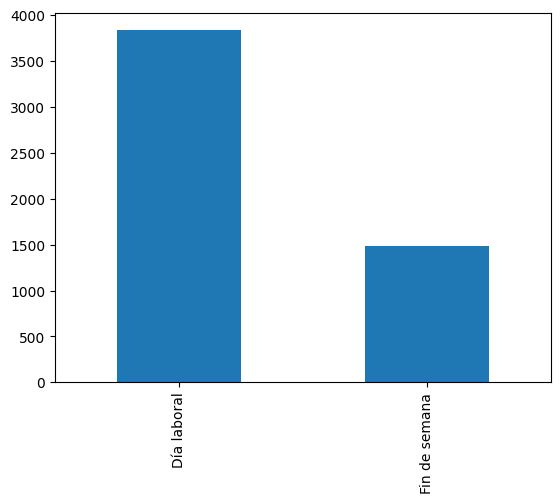

In [8]:
df['Day_of_Week'].value_counts().plot(kind='bar')

<Axes: >

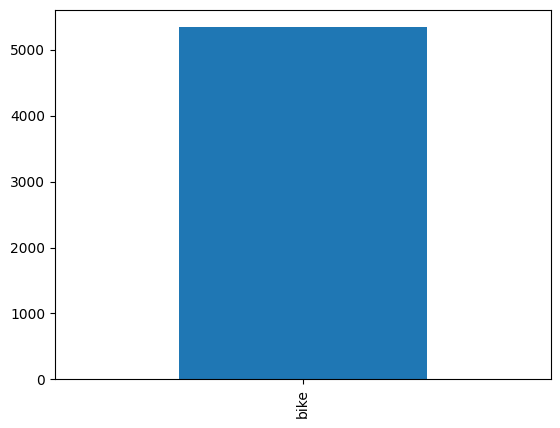

In [9]:
df['Vehicle_Type'].value_counts().plot(kind='bar')

**Esto es problematico, vemos que en la base de datos solo hay ejemplos para muertes de bicicletas**. Por tanto esta variable es irrelevante. **Vamos a dropearla de una vez de la base de datos**

In [10]:
df = df.drop('Vehicle_Type', axis=1)

In [11]:
df.dtypes

Time                                            string
Number_of_Casualties                             int64
Day_of_Week                                     string
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

* Ahora bien, ya que terminamos el analisis de las variables string continuaremos con las que son categoricas segun la base de datos. Sin embargo antes analizaremos una la columna Unnamed. **Llama la atención que hay un alto porcentaje de valores nulos**

In [19]:
print('Hay ' + str(len(df['Unnamed: 14'].isna())) + ' valores nulos en esta columna de ' + str(df.shape[0]))

Hay 5338 valores nulos en esta columna de 5338


In [20]:
#Vamos a dropearla
df = df.drop('Unnamed: 14', axis=1)

### 1.1 Análisis Variables categoricas

* Segun el diccionario de la base de datos las siguientes variables son categoricas
    - Accident_severity
    - Day_of_Week
    - Time
    - Road type
    - Junction_detail
    - Light_conditions
    - Weather_Conditions
    - Road_surface_conditions
    - Urban_or_Rural_Area
    - Vehicle_Type
    - Did_Police_Officer_Attend_Scene_of_Accident



* Vamos a convertir estas a str y ver sus distribuciones entre las categoriasy analizar los resultados.

#### 1.1.1 Convertir a string

In [27]:
cat_vars = ['Accident_Severity', 
'Day_of_Week', 
'Time', 'Road_Type', 
'Junction_Detail', 
'Light_Conditions', 
'Weather_Conditions', 
'Road_Surface_Conditions', 
'Urban_or_Rural_Area', 
#'Vehicle_type', // Esta la dropeamos
'Did_Police_Officer_Attend_Scene_of_Accident']

for var in cat_vars:
    df[var] = df[var].astype('string')

In [28]:
df.dtypes

Time                                            string
Number_of_Casualties                             int64
Day_of_Week                                     string
Road_Type                                       string
Speed_limit                                    float64
Light_Conditions                                string
Weather_Conditions                              string
Road_Surface_Conditions                         string
Urban_or_Rural_Area                             string
Did_Police_Officer_Attend_Scene_of_Accident     string
Junction_Detail                                 string
Number_of_Vehicles                               int64
Accident_Severity                               string
dtype: object

#### 1.1.2 Reemplazar por labels del diccionario

In [30]:
# Bien, ahora miremos las distribuciones
def plot_distribution(df: pd.DataFrame, col: str):
    df[col].value_counts().plot(kind='bar')

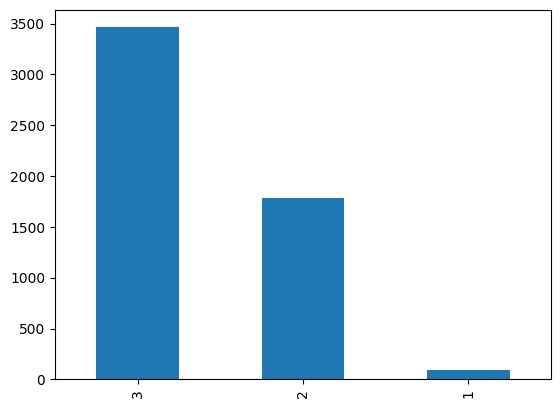

In [33]:
plot_distribution(df, 'Accident_Severity')